In [370]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [371]:
weather = pd.read_csv("data/archive.csv", ",", parse_dates= ["time"])
weather

C:\Users\MICHELE\AppData\Local\Temp\ipykernel_19020\3172528386.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  weather = pd.read_csv("data/archive.csv", ",", parse_dates= ["time"])


,time,weathercode (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),windspeed_10m_max (km/h),windgusts_10m_max (km/h)
0,2020-07-31,2,34.5,22.3,28.4,38.5,26.2,32.0,0.0,0.0,0.0,11.3,19.8
1,2020-08-01,53,35.4,23.0,29.1,39.6,26.6,32.8,1.1,1.1,0.0,11.8,17.3
2,2020-08-02,63,30.6,22.9,26.6,33.3,25.5,29.3,8.0,8.0,0.0,15.6,33.1
3,2020-08-03,63,24.3,19.1,21.1,26.0,17.8,22.9,37.9,37.9,0.0,13.9,27.4
4,2020-08-04,2,26.1,17.2,21.0,24.9,14.6,19.2,0.0,0.0,0.0,16.2,34.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2023-07-27,51,25.5,16.1,21.0,27.1,15.1,21.1,0.1,0.1,0.0,13.3,24.1
1092,2023-07-28,3,28.2,17.8,23.0,29.7,18.9,24.6,0.0,0.0,0.0,8.8,16.6
1093,2023-07-29,51,28.2,19.2,23.6,31.0,20.7,26.2,0.1,0.1,0.0,7.6,18.7
1094,2023-07-30,51,30.2,19.2,24.7,32.7,21.5,27.2,0.4,0.4,0.0,9.9,19.4


<AxesSubplot:>

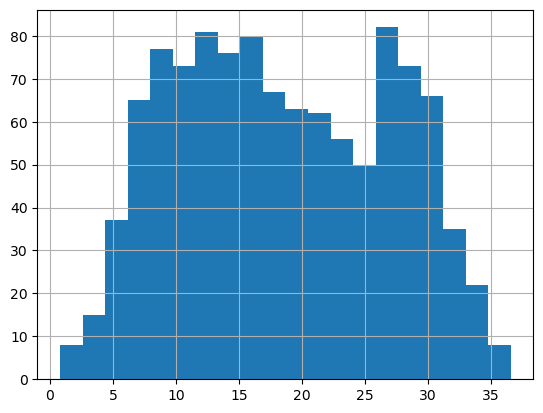

In [372]:
weather["temperature_2m_max (°C)"].hist(bins=20)

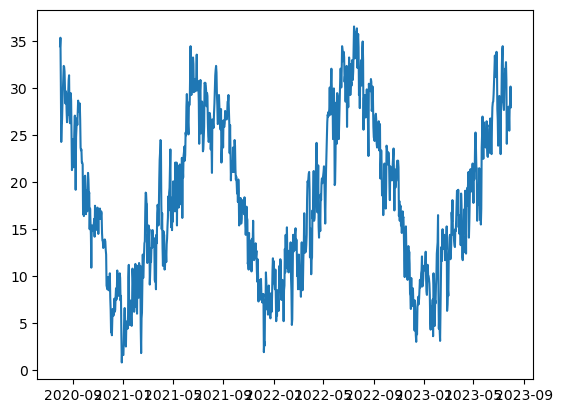

<Figure size 3000x3000 with 0 Axes>

In [373]:
plt.plot(weather.time, weather["temperature_2m_max (°C)"])
plt.figure(figsize=(30,30))
plt.show()

## Temperature medie delle temperature massime per mese

In [374]:
months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
means = []
for month in months : 
    mean = weather[(weather["time"].dt.strftime('%m'))==month]["temperature_2m_max (°C)"].mean()
    means.append(mean)
    print("Mese:", month, mean)
max_per_month = pd.DataFrame({"months" : months, "max_per_month" : means})
max_per_month

Mese: 01 7.945161290322582
Mese: 02 11.174999999999999
Mese: 03 14.232258064516126
Mese: 04 17.104444444444436
Mese: 05 22.207526881720426
Mese: 06 29.019999999999996
Mese: 07 29.743617021276588
Mese: 08 28.180645161290315
Mese: 09 23.862222222222215
Mese: 10 18.32043010752688
Mese: 11 12.603333333333333
Mese: 12 7.202150537634408


,months,max_per_month
0,01,7.945161
1,02,11.175000
2,03,14.232258
3,04,17.104444
4,05,22.207527
5,06,29.020000
6,07,29.743617
7,08,28.180645
8,09,23.862222
9,10,18.320430


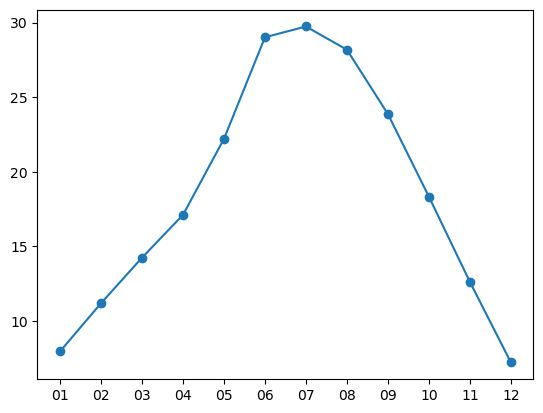

<Figure size 3000x3000 with 0 Axes>

In [375]:
plt.plot(max_per_month.months, max_per_month["max_per_month"], marker='o')
plt.figure(figsize=(30,30))
plt.show()

## Temperature medie delle temperature massime per anno

In [376]:
years = np.arange(int(weather["time"].dt.strftime('%Y').min()), int(weather["time"].dt.strftime('%Y').max())+1)
means = []
for year in years : 
    mean = weather[(weather["time"].dt.strftime('%Y'))==str(year)]["temperature_2m_max (°C)"].mean()
    means.append(mean)
    print("Anno:", year, mean)
max_per_year = pd.DataFrame({"years" : years, "max_per_year" : means})
max_per_year

Anno: 2020 17.69415584415585
Anno: 2021 17.791232876712332
Anno: 2022 19.54520547945206
Anno: 2023 18.571698113207535


,years,max_per_year
0,2020,17.694156
1,2021,17.791233
2,2022,19.545205
3,2023,18.571698


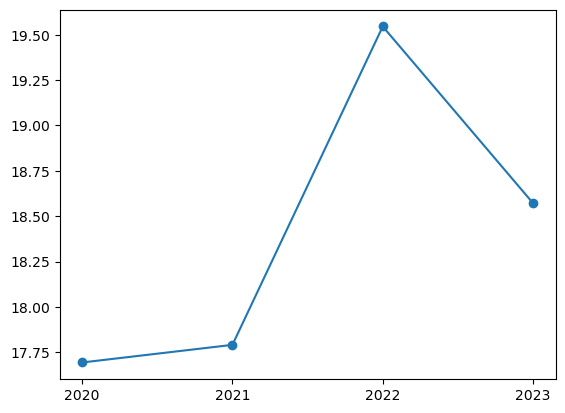

<Figure size 3000x3000 with 0 Axes>

In [377]:
plt.plot(max_per_year.years.astype(str), max_per_year["max_per_year"], marker='o')
plt.figure(figsize=(30,30))
plt.show()

,time,weathercode (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),windspeed_10m_max (km/h),windgusts_10m_max (km/h)
185,2021-02-01,51,6.7,3.2,4.9,4.7,0.5,2.5,1.0,1.0,0.00,8.8,24.5
186,2021-02-02,3,7.8,-0.8,3.1,5.7,-3.4,0.9,0.0,0.0,0.00,5.6,12.2
187,2021-02-03,51,6.0,0.4,4.0,4.4,-1.8,2.0,0.6,0.6,0.00,6.5,13.7
188,2021-02-04,3,11.1,1.7,6.6,9.8,-1.0,4.9,0.0,0.0,0.00,6.3,17.3
189,2021-02-05,51,9.6,6.4,7.7,8.6,5.0,6.5,0.1,0.1,0.00,6.0,13.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,2023-02-24,51,12.9,7.6,9.8,11.9,6.2,8.7,1.7,1.7,0.00,6.3,14.0
939,2023-02-25,51,15.3,5.7,10.2,12.6,3.7,8.4,0.2,0.2,0.00,13.7,26.3
940,2023-02-26,73,6.3,1.8,4.1,3.8,-1.0,0.9,8.6,5.6,2.10,15.3,37.1
941,2023-02-27,71,7.0,0.7,3.3,3.0,-2.4,0.1,2.1,0.9,0.84,11.4,24.1


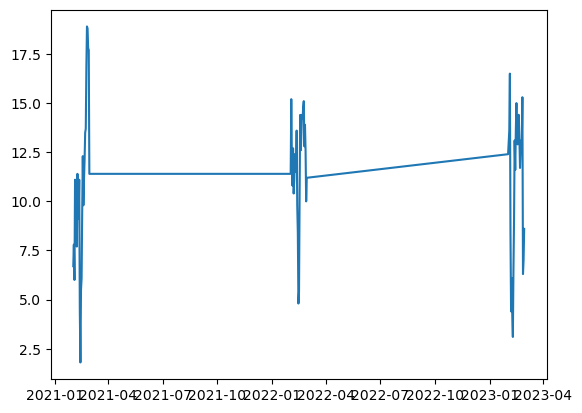

In [378]:
w = weather[(weather["time"].dt.strftime('%m'))==months[1]]

plt.plot(w.time, w["temperature_2m_max (°C)"])
w